# Workflow & Hyperparameter Optimization

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

🏠 Import the house price data set. We will keep only numerical features for the sake of simplicity

🎯 Your goal will be to fit the best KNN Regressor. In particular, how many "neighbors" (<font color=blue>K</font> in <font color=blue>K</font>NN) should you consider to get the best predictions for your house prices ?

In [2]:
# Load raw data
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv', index_col="Id")

# Only keep numerical columns and raws without NaN
data = data.select_dtypes(include=np.number).dropna()

data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [3]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

## 1. Train/Test split

❓ **Question (Holdout)**❓

👇 Split the dataset to create your `X_train` `X_test` and `y_train` `y_test`. Use:
- `test_size=0.3`
- `random_state=0` to compare your results with your buddy

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
123,20,75.0,9464,6,7,1958,1958,135.0,570,0,...,288,0,0,0,0,130,0,0,6,2008
151,20,120.0,10356,5,6,1975,1975,0.0,716,0,...,440,0,0,0,0,0,0,0,1,2007
951,20,60.0,7200,5,8,1950,2002,0.0,398,149,...,720,194,0,0,0,0,0,0,7,2007
47,50,48.0,12822,7,5,2003,2003,0.0,1351,0,...,670,168,43,0,0,198,0,0,8,2009
194,160,24.0,2522,7,5,2004,2004,50.0,0,0,...,380,0,40,0,0,0,0,0,5,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,30,50.0,6000,4,4,1920,1950,0.0,250,0,...,308,0,0,168,0,0,0,0,7,2007
991,60,82.0,9452,8,5,1997,1998,423.0,1074,0,...,870,0,70,0,0,0,0,0,6,2006
1084,20,80.0,8800,6,6,1964,1964,425.0,553,0,...,461,0,116,0,0,0,0,700,3,2006


## 2. Scaling

⚖️ Scaling is always crucially important for the KNN algorithm..

❓ **Question (Scaling)** ❓ 

* Scale your train set and test set.
* Here, let's simply apply the `StandardScaler` and not waste time choosing one scaler per feature. Indeed, the goals of this exercise are to:
    * review KNN
    * understand GridSearchCV
    * understand RandomizedSearchCV

In [ ]:
# scale with standardScaler for all features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


## 3. Baseline KNN model

❓ **Question (A baseline for our KNN)** ❓

Cross-validate (*cv = 5*) a simple KNN regressor taking into account only _the closest neighbor_, and compute the average score over the 5 folds.

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor(n_neighbors=1)

cv_scores = cross_val_score(knn, X_train, y_train, cv=5)

cv_scores.mean()

0.5601542887874071

## 4. GridSearch

### 4.1. A first GridSearch

❓ **Question (GridSearch v1)**❓

Let's use SKLearn `GridSearchCV` to find the best KNN hyperparameter `n_neighbors`.
- Start a coarse-grain approach, with `n_neighbors` = [1,5,10,20,50]
- 5-fold cross-validate each parameter
- Make sure to maximize your performance time using `n_jobs`

In [19]:
from sklearn.model_selection import GridSearchCV

# Instantiate model
model = KNeighborsRegressor()

# Hyperparameter Grid
grid = {
    'n_neighbors': [1,5,10,20,50]
}

# Instantiate Grid Search
search = GridSearchCV(
    model,
    grid,
    scoring = 'r2',
    cv = 5,
    n_jobs=-1 # parallelize computation
)

# Fit data to Grid Search
search.fit(X_train, y_train);

❓ **Question (best parameters)** ❓

According to the GridSearch, what is the optimal K value?

In [16]:
# Best Params
search.best_params_

{'n_neighbors': 10}

❓ **Question (scoring)** ❓ What is the best score the optimal K value produced?

In [ ]:
# Best score
search.best_score_

0.7596697382171873

### 4.2. A second GridSearch

❓ **Question (GridSearch V2)** ❓


Now, we have an idea about where the best $K$ lies, but some of the values we didn't try could result in a  better performance.

* Re-run a GridSearch trying some values for $K$ around to your previous best value
* What are the `best_score` and `best_k` for this refined GridSearch?

In [21]:
from sklearn.model_selection import GridSearchCV

# Instantiate model
model = KNeighborsRegressor()

# Hyperparameter Grid
grid = {
    'n_neighbors': [6,7,8,9,10,11,12,13,14,15,16,17,18,19]
}

# Instantiate Grid Search
search = GridSearchCV(
    model,
    grid,
    scoring = 'r2',
    cv = 5,
    n_jobs=-1 # parallelize computation
)

# Fit data to Grid Search
search.fit(X_train, y_train);

In [29]:
# Best k
best_k = 16
search.best_params_

{'n_neighbors': 16}

In [27]:
# Best Score
best_score = search.best_score_
best_score

0.7666311417513013

***🧪 Test your code***

In [28]:
from nbresult import ChallengeResult
result = ChallengeResult('knn',
                         best_k=best_k,
                         best_score=best_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/baska/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/baska/code/Svvcm/05-ML/05-Model-Tuning/data-workflow/tests
plugins: typeguard-2.13.3, anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_knn.py::TestKnn::test_best_k PASSED                                 [ 50%]
test_knn.py::TestKnn::test_best_score PASSED                             [100%]

============================== 2 passed in 0.31s ===============================


💯 You can commit your code:

git add tests/knn.pickle

git commit -m 'Completed knn step'

git push origin master



### 4.3. Visual check (manual GridSearch)

☝️ This problem is actually simple enough to perform a GridSearch manually.

❓ **Question(Manual GridSearch)** ❓

- Loop manually over all values of $K$ from $1$ to $50$ and store the average of the cross-validated scores of each model in a list.
- Plot the scores as a function of $K$ to visually find the best $K$ using the `Elbow Method`

In [ ]:
k_values = range(1, 51)
cv_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='r2')
    cv_scores.append(scores.mean())

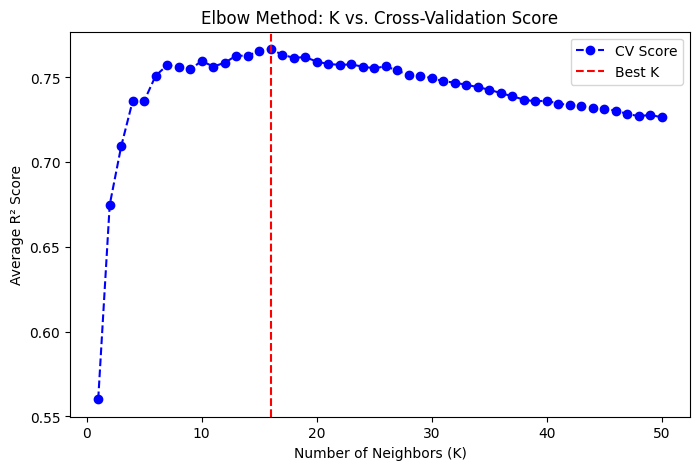

Best K: 16
Best R² Score: 0.7666311417513013


In [39]:
import matplotlib.pyplot as plt
# Plot the results (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o', linestyle='dashed', color='b', label="CV Score")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Average R² Score")
plt.title("Elbow Method: K vs. Cross-Validation Score")
plt.axvline(x=k_values[np.argmax(cv_scores)], color='r', linestyle="--", label="Best K")
plt.legend()
plt.show()

# Print the best K
best_k = k_values[np.argmax(cv_scores)]
print("Best K:", best_k)
print("Best R² Score:", max(cv_scores))

❓Can you guess what makes GridSearchCV a better option than such manual loop ?


## Sklearn's `n_jobs=-1` allows you to parallelize the search, utilizing all of your CPU cores

<details>
    <summary>Answer</summary>

- Sklearn's `n_jobs=-1` allows you to parallelize the search, utilizing all of your CPU cores
- What if you had multiple hyper-parameters to co-optimize?
</details>

## 5. GridSearch with multiple parameters

👩🏻‍🏫 KNNRegressor suppports various _distance metrics_ via the hyper-parameter `p` 

📚 [sklearn.neighbors.KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

❓ **Question (tuning multiple parameters)** ❓


* Use GridSearchCV to search for the best $K$ and $p$ simultaneously.
    * Try all combinations for $K = [1, 5, 10, 20, 50]$ and $p = [1, 2, 3]$. 

In [41]:
from sklearn.model_selection import GridSearchCV

# Instantiate model
model = KNeighborsRegressor()

# Hyperparameter Grid
grid = {
    'n_neighbors': [1,5,10,20,50],
    'p' : [1,2,3]
}

# Instantiate Grid Search
search = GridSearchCV(
    model,
    grid,
    scoring = 'r2',
    cv = 5,
    n_jobs=-1 # parallelize computation
)

# Fit data to Grid Search
search.fit(X_train, y_train);

❓ **Question (number of submodels)**❓

How many submodels did you train overall?

<details>
    <summary>Hint</summary>

Much more than 15. Think twice :)
    <details>
    <summary>Answer</summary>

75 models due to CV=5
</details>

In [45]:
number_of_submodels = 15 * 5
number_of_submodels

75

❓ **Question (best parameters and best score after tuning the model with multiple parameters)**❓

What are the *best parameters* and the *best score*?

In [43]:
search.best_params_


{'n_neighbors': 10, 'p': 1}

In [ ]:
search.best_score_

0.7969255879201194

## 6. Random Search

Now let's see whether a RandomizedSearch can find a better combination with the same number of models being fitted.

❓ **Question (RandomizedSearchCV)** ❓

Use `RandomizedSearchCV` to
- Randomly sample $K$ from a uniform `scipy.stats.randint(1,50)` ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html)) distribution
- Sample $p$ from a list $[1,2,3]$
- Use the correct numbers of `n_iter` and `cv` to fit the exact same numbers of models as in your previous GridSearchCV.

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

# Instantiate model
model = KNeighborsRegressor()

# Hyperparameter Grid
grid = {'n_neighbors': stats.randint(1,50), 'p': [1,2,3]}

# Instantiate Grid Search
search = RandomizedSearchCV(
    model,
    grid,
    scoring='r2',
    n_iter=100,  # number of draws
    cv=5, n_jobs=-1
)

# Fit data to Grid Search
search.fit(X_train, y_train)
search.best_estimator_

KNeighborsRegressor(n_neighbors=9, p=1)

## 7. Generalization

❓ **Question (finetuning your model one more time)**❓

- Refine your RandomsearchCV if you want
- Choose your best model

In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor(n_neighbors=9, p=1)

cv_scores = cross_val_score(knn, X_train, y_train, cv=5)

cv_scores.mean()

0.7974801437687364

Now try to display your `cv_results` as a `DataFrame`, this will help you visualize what's going on inside the CV! 😉

In [53]:
cv_results_df = pd.DataFrame({
    "Fold": range(1, 6),
    "R² Score": cv_scores
})
cv_results_df


,Fold,R² Score
0,1,0.762593
1,2,0.823336
2,3,0.741549
3,4,0.867283
4,5,0.792639


❓ **Question (Evaluation of the "best" model)** ❓

* Time has come to discover our model's performance with "best params" on the **unseen** test set `X_test`.
    * Compute the r2 score for the test set and save it as `r2_test`.

In [49]:
knn.fit(X_train,y_train)
r2_test = knn.score(X_test,y_test)

In [51]:
r2_test

0.7717618297938307

❓ **Question (Taking a step back)** ❓

Would you consider the optimized model to generalize well?

<details><summary>Answer</summary>

Test score may decrease a bit with train set. Probably not more than 5%. This can be due to
- A non-representative train/test split
- A cross-val number too small leading to overfitting the model-tuning phase. The more you cross-validated, the more robust your findings will generalize - but you can't increase cv too much if your dataset is too small as you won't keep enough observations in each fold to be representative.
- Our dataset is very small and our hyperparameter optimization is thus extremely dependent (and overfitting) on our train/test split. Always make sure your dataset is much bigger than the total number of hyperparameter combinations you are trying out!
    
</details>

***🧪 Test your code***

In [50]:
from nbresult import ChallengeResult
result = ChallengeResult('r2',
                         r2_test=r2_test)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/baska/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/baska/code/Svvcm/05-ML/05-Model-Tuning/data-workflow/tests
plugins: typeguard-2.13.3, anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_r2.py::TestR2::test_r2 PASSED                                       [100%]

============================== 1 passed in 0.36s ===============================


💯 You can commit your code:

git add tests/r2.pickle

git commit -m 'Completed r2 step'

git push origin master



🏁 Congratulations! Now, you know how to finetune a model using either a GridSearchCV or a RandomizedSearchCV 

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!